# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice.
mouse_data_complete_df['Mouse ID'].value_counts().count()

249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicate_df = mouse_data_complete_df.loc[mouse_data_complete_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mouse_duplicate_df


array(['g989'], dtype=object)

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_df = mouse_data_complete_df.loc[(mouse_data_complete_df['Mouse ID'] == 'g989')] 
mouse_duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_data_complete_df.loc[(mouse_data_complete_df['Mouse ID'] != 'g989')] 
mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_df['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugregimen_group_df = mouse_clean_df.groupby('Drug Regimen')
drugregimen_mean = drugregimen_group_df['Tumor Volume (mm3)'].mean()
drugregimen_median = drugregimen_group_df['Tumor Volume (mm3)'].median()
drugregimen_var = drugregimen_group_df['Tumor Volume (mm3)'].var()
drugregimen_std = drugregimen_group_df['Tumor Volume (mm3)'].std()
drugregimen_sem = drugregimen_group_df['Tumor Volume (mm3)'].sem()


drugregimen_summary = pd.DataFrame({'Mean Tumor Volume': drugregimen_mean,
                        'Median Tumor Volume': drugregimen_median,
                        'Tumor Volume Variance': drugregimen_var, 
                        'Tumor Volume Std. Dev.': drugregimen_std,
                        'Tumor Volume Std. Err.': drugregimen_sem })


drugregimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drugregimen_summary_agg = mouse_clean_df.groupby(mouse_clean_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", "median","var",  "std",  "sem"])                                             

drugregimen_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timespoints')

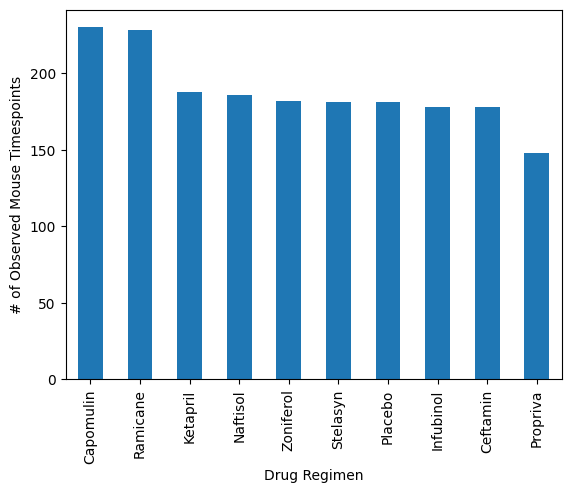

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_fig = mouse_clean_df["Drug Regimen"].value_counts().plot(kind='bar')
mouse_fig.set_xlabel ("Drug Regimen")
mouse_fig.set_ylabel ("# of Observed Mouse Timespoints")

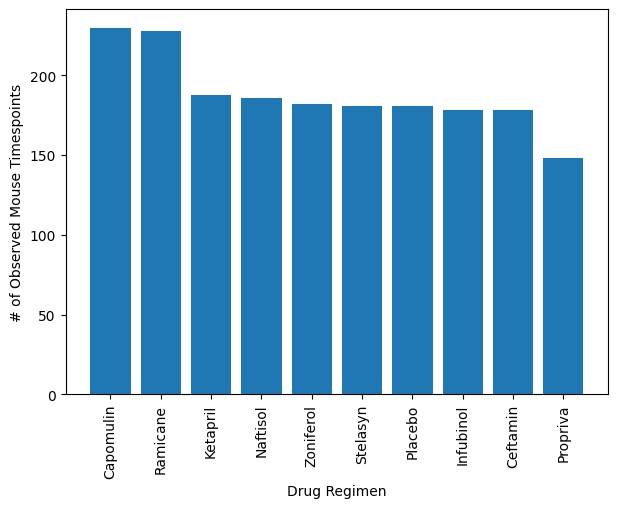

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_figure = mouse_clean_df["Drug Regimen"].value_counts()                
plt.figure(figsize=(7,5))                                            
plt.bar(mouse_figure.index, mouse_figure.values)                 
plt.xlabel ("Drug Regimen")
plt.ylabel ("# of Observed Mouse Timespoints")
plt.xticks(rotation='vertical')                              
plt.show()

Text(0, 0.5, 'Sex')

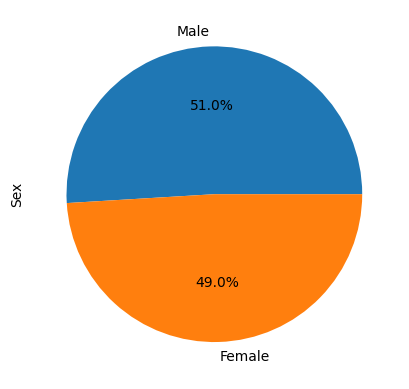

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_fig = mouse_clean_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%',)
sex_fig.set_ylabel("Sex")

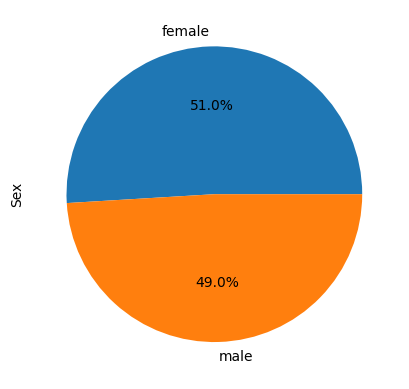

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_figure = mouse_clean_df["Sex"].value_counts()
plt.pie(sex_figure,labels=('female', 'male'), autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_clean_df.groupby(["Drug Regimen", "Mouse ID"])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.merge(greatest_timepoint, mouse_clean_df, how="left", on=('Drug Regimen', 'Mouse ID', 'Timepoint'))
greatest_timepoint_df.head()



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22


In [78]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes     
for name in treatment_names:
    # Extract tumor volumes for the current treatment
    tumor_volumes_df = greatest_timepoint_df.loc[greatest_timepoint_df["Drug Regimen"] == name]["Tumor Volume (mm3)"]
    tumor_vol.append(tumor_volumes_df) 
     # Add subset
    quartiles = tumor_volumes_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes_df.loc[(tumor_volumes_df > upper_bound) | (tumor_volumes_df < lower_bound)]

    print(f"{name}s potential outliers: {outliers}.")


Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinols potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


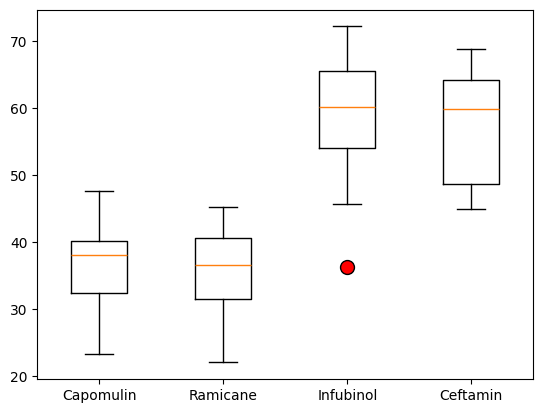

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.boxplot(tumor_vol, flierprops = dict(marker = "o", markersize=10, markerfacecolor = "red"))
ax.xaxis.set(ticklabels=treatment_names)
plt.show()


## Line and Scatter Plots

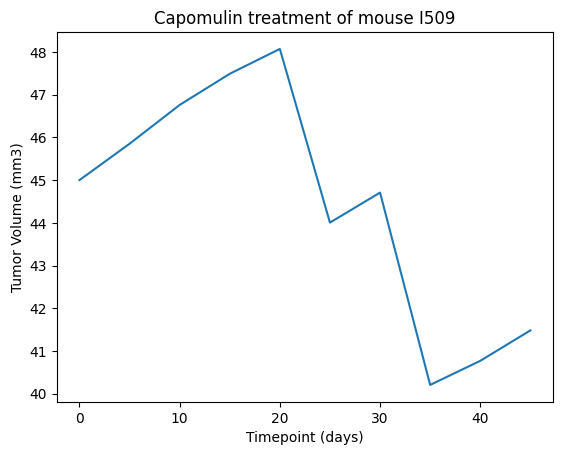

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_I509 = mouse_clean_df.loc[(mouse_clean_df["Drug Regimen"] == 'Capomulin') & (mouse_clean_df["Mouse ID"] == 'l509'), :]
plt.plot(capomulin_mouse_I509["Timepoint"], capomulin_mouse_I509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

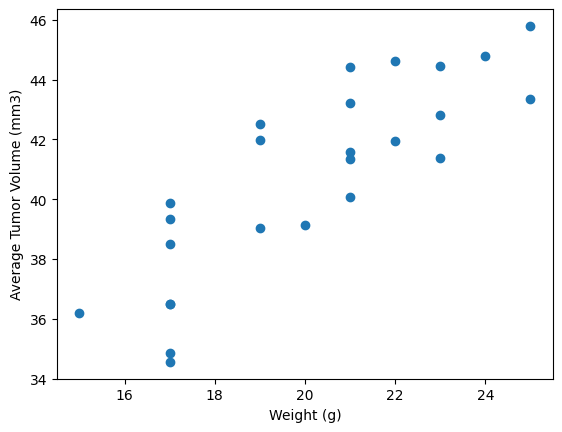

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = mouse_clean_df.loc[(mouse_clean_df["Drug Regimen"] == 'Capomulin'),:]
mouse_group = capomulin_df.groupby(['Mouse ID'])
mouse_wg = mouse_group["Weight (g)"].mean()
mouse_tv = mouse_group["Tumor Volume (mm3)"].mean()

mouse_df = pd.DataFrame({"Weight (g)": mouse_wg,
                         "Tumor Volume (mm3)": mouse_tv })
                          
plt.scatter(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"], marker = "o")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


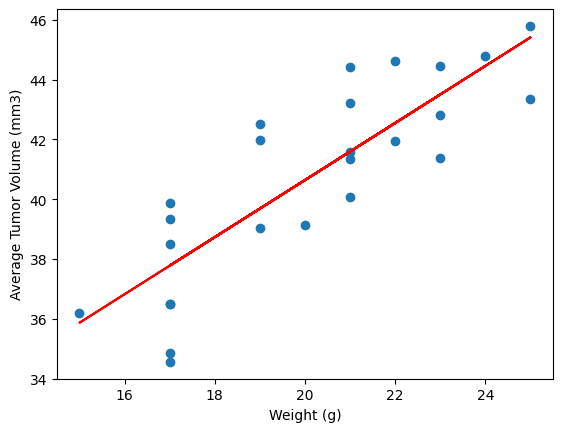

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
linear_reg = slope * (mouse_df["Weight (g)"]) + intercept
                          
plt.scatter(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
plt.plot(mouse_df["Weight (g)"], linear_reg, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
